In [19]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from numpy import mean 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [3]:
 X, y = make_classification(
    n_samples=10000, 
    n_features=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    weights=[0.99], 
    flip_y=0, 
    random_state=4
    )

In [4]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


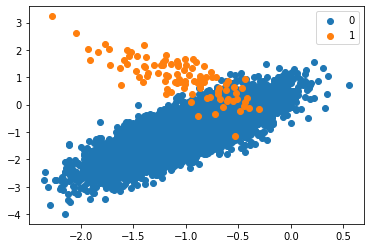

In [5]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [7]:
svm_model = SVC(gamma='scale')

In [8]:
cross_val = RepeatedStratifiedKFold(
    n_splits=10, 
    n_repeats=3, random_state=1
    )

In [9]:
scores = cross_val_score(svm_model, X, y, scoring='roc_auc', cv=cross_val, n_jobs=-1)

In [10]:
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.808


In [11]:
svm_model_1 = SVC(gamma='scale', class_weight='balanced')

In [12]:
cross_val = RepeatedStratifiedKFold(
    n_splits=10, 
    n_repeats=3, 
    random_state=1
    )

In [13]:
scores = cross_val_score(svm_model_1, X, y, scoring='roc_auc', cv=cross_val, n_jobs=-1)

In [14]:
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.967


In [15]:
svm_model_2 = SVC(gamma='scale')

In [16]:
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

In [17]:
cross_val = RepeatedStratifiedKFold(
    n_splits=10, 
    n_repeats=3, 
    random_state=1
    )

In [20]:
grid = GridSearchCV(estimator=svm_model_2, param_grid=param_grid, n_jobs=-1, cv=cross_val, scoring='roc_auc')

In [21]:
grid_result = grid.fit(X, y)

In [22]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.967747 using {'class_weight': {0: 1, 1: 100}}


In [23]:
means = grid_result.cv_results_['mean_test_score']

In [24]:
stds = grid_result.cv_results_['std_test_score']

In [25]:
params = grid_result.cv_results_['params']

In [26]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.742960 (0.149857) with: {'class_weight': {0: 100, 1: 1}}
0.748404 (0.149873) with: {'class_weight': {0: 10, 1: 1}}
0.807960 (0.126354) with: {'class_weight': {0: 1, 1: 1}}
0.934401 (0.065202) with: {'class_weight': {0: 1, 1: 10}}
0.967747 (0.038637) with: {'class_weight': {0: 1, 1: 100}}
